Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_recall_curve,f1_score,auc
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split
from time import time
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import tensorflow 
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras_self_attention import SeqSelfAttention
import re
import gensim

Import Dataset

In [3]:
formspring='https://raw.githubusercontent.com/eimearfoley/CyberBullyingDetection/master/data/formspring.csv'

In [4]:
df=pd.read_csv(formspring)

Analyze Dataset

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     12896 non-null  object
 1   post       12852 non-null  object
 2   ques       12852 non-null  object
 3   ans        12820 non-null  object
 4   asker      12801 non-null  object
 5   ans1       12759 non-null  object
 6   severity1  12788 non-null  object
 7   bully1     1909 non-null   object
 8   ans2       12701 non-null  object
 9   severity2  12739 non-null  object
 10  bully2     1786 non-null   object
 11  ans3       12655 non-null  object
 12  severity3  12698 non-null  object
 13  bully3     1780 non-null   object
dtypes: object(14)
memory usage: 1.4+ MB


,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


In [6]:
df['post'][:10]

0    Q: what&#039;s your favorite song? :D<br>A: I ...
1                       Q: <3<br>A: </3 ? haha jk! <33
2    Q: &quot;hey angel  you duh sexy&quot;<br>A: R...
3                                       Q: (:<br>A: ;(
4    Q: ******************MEOWWW*******************...
5    Q: any makeup tips? i suck at doing my makeup ...
6    Q: Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s...
7    Q: Are you a morning or night person?<br>A: Ni...
8    Q: are you a trusting person?<br>A: alreadi an...
9    Q: are you a trusting person?<br>A: Yes veryy ...
Name: post, dtype: object

In [7]:
df['ques'][:10]

0               what&#039;s your favorite song? :D<br>
1                                                   <3
2                  &quot;hey angel  you duh sexy&quot;
3                                                   (:
4    ******************MEOWWW*************************
5       any makeup tips? i suck at doing my makeup lol
6    Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...
7                   Are you a morning or night person?
8                           are you a trusting person?
9                           are you a trusting person?
Name: ques, dtype: object

In [8]:
df['ans'][:10]

0             I like too many songs to have a favorite
1                                   </3 ? haha jk! <33
2                             Really?!?! Thanks?! haha
3                                                   ;(
4                                              *RAWR*?
5     Sure! Like tell me wht u wnna know?! Like wht...
6     EMMA hahahahah :D I MISSSSSeddd YUHHHHh 22222...
7                                      Night 4shuree!!
8                                       alreadi answrd
9         Yes veryy trustin person!!! May i help yuh:!
Name: ans, dtype: object

In [9]:
df['bully1'][100:110]

100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107    NaN
108    NaN
109    NaN
Name: bully1, dtype: object

In [10]:
df['bully1'].value_counts()

None                                                                    593
Na                                                                       89
N/A.                                                                     74
no                                                                       47
N/a                                                                      47
                                                                       ... 
nigger                                                                    1
eat our children                                                          1
'FAGGOT' 'Fuckk' 'faggot' 'faggot'                                        1
IMA BITE DA TIP OF YO DICK OFFF N SPLATTER IT INTO ITTY BITTY PIECES      1
r u a dirty slut                                                          1
Name: bully1, Length: 1012, dtype: int64

In [11]:
print(df['ans1'].value_counts())
print(df['ans2'].value_counts())
print(df['ans3'].value_counts())

No     11693
Yes     1038
0         12
3          5
5          5
1          2
7          1
6          1
2          1
4          1
Name: ans1, dtype: int64
No     11696
Yes     1005
Name: ans2, dtype: int64
No     11711
Yes      944
Name: ans3, dtype: int64


In [12]:
df = df[df['post'].notna()]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12852 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     12852 non-null  object
 1   post       12852 non-null  object
 2   ques       12850 non-null  object
 3   ans        12819 non-null  object
 4   asker      12801 non-null  object
 5   ans1       12759 non-null  object
 6   severity1  12788 non-null  object
 7   bully1     1909 non-null   object
 8   ans2       12701 non-null  object
 9   severity2  12739 non-null  object
 10  bully2     1786 non-null   object
 11  ans3       12655 non-null  object
 12  severity3  12698 non-null  object
 13  bully3     1780 non-null   object
dtypes: object(14)
memory usage: 1.5+ MB


In [14]:
ans=np.array(df['ans'])
ques=np.array(df['ques'])
posts=[]
for i in range (0,len(ans)):
  posts.append(str(ques[i])+str(ans[i]))

In [15]:
print(ques[0])
print(ans[0])
print(posts[0])

what&#039;s your favorite song? :D<br>
 I like too many songs to have a favorite
what&#039;s your favorite song? :D<br> I like too many songs to have a favorite


In [16]:
y1=np.array(df['ans1'])
y2=np.array(df['ans2'])
y3=np.array(df['ans3'])

In [17]:
X=[]
y=[]
for i in range (len(posts)):
  X.append(posts[i])
  if y1[i]=='Yes' :
    y.append(1)
  else:
    y.append(0)

Data Preprocessing

In [18]:
X=np.array(X)
X=np.reshape(X,(-1,1))
y=np.array(y)


In [19]:
X.shape,y.shape

((12852, 1), (12852,))

In [20]:
print(Counter(y))

Counter({0: 11814, 1: 1038})


In [21]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler( sampling_strategy=0.3)
X,y=oversample.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
X.shape,y.shape

((15358, 1), (15358,))

In [23]:
print(Counter(y))

Counter({0: 11814, 1: 3544})


In [24]:
X[:6],y[:6]

(array([['what&#039;s your favorite song? :D<br> I like too many songs to have a favorite'],
        ['<3 </3 ? haha jk! <33'],
        ['&quot;hey angel  you duh sexy&quot; Really?!?! Thanks?! haha'],
        ['(: ;('],
        ['******************MEOWWW************************* *RAWR*?'],
        ['any makeup tips? i suck at doing my makeup lol Sure! Like tell me wht u wnna know?! Like wht do you use?!']],
       dtype='<U5541'), array([0, 0, 0, 0, 0, 0]))

In [25]:
type(X)

numpy.ndarray

In [26]:
X=[str(x) for x in X]

In [27]:
type(X)

list

Create Word Embeddings

In [28]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
stopwords=stopwords.words('english')

In [30]:
contractions =dict({ 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": " he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": " he would",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that has",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they had",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who has",
"who’ve": "who have",
"why’s": "why has",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have"
})

In [31]:
contractions["it’s"]

'it is'

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 8273, 1: 2477})
Counter({0: 3541, 1: 1067})


In [34]:
def cleanText(X):
  corpus=[]
  for para in X:
      sentences=nltk.sent_tokenize(str(para))
      temp=[]
      for sentence in sentences:
          sentence=sentence.lower()
          cleanr = re.compile('<.*?>')
          sentence = re.sub(cleanr, '', sentence)
          sentence=re.sub(r'[\!"#$%&\*+,./;<=>?@_`|~=]','',sentence)
          sentence=re.sub(r'[0-9]+', '',sentence)
          words=sentence.split()
          words_list=[]
          for word in words:
            if word in contractions:
              words_list.append(contractions[word])
            elif word not in stopwords:
              words_list.append(WordNetLemmatizer().lemmatize(word) )
          sent=' '.join(words_list)
          sent=re.sub(pattern=r'\'',repl='',string=sent)
          temp.append(sent)
      corpus.append('. '.join(temp))
  return corpus

In [35]:
corpus=cleanText(X_train)
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)


In [36]:
print(len(corpus))
print(len(lst_corpus))

10750
10750


In [37]:
corpus[:6]

['[awhh shit dx man. (: taelin walker webb ]',
 '[if could watch one tv show would. office ]',
 '[lol :) xxx ]',
 '[its prolly think wanted know thought :) welll]',
 '[holar :) wasup]',
 '[lol :] anonymous]']

In [38]:
lst_corpus[:6]

[['[awhh', 'shit', 'dx', 'man.', '(:', 'taelin', 'walker', 'webb', ']'],
 ['[if', 'could', 'watch', 'one', 'tv', 'show', 'would.', 'office', ']'],
 ['[lol', ':)', 'xxx', ']'],
 ['[its', 'prolly', 'think', 'wanted', 'know', 'thought', ':)', 'welll]'],
 ['[holar', ':)', 'wasup]'],
 ['[lol', ':]', 'anonymous]']]

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index

In [40]:
X_train= tokenizer.texts_to_sequences(lst_corpus)

In [41]:
arr=[]
arr=[len(x) for x in corpus if len(x)<500]

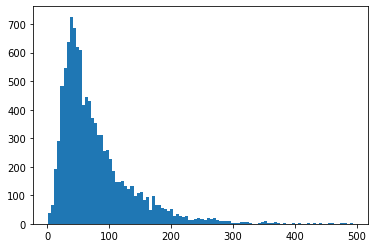

In [42]:
plt.hist(arr,bins=100)
plt.show()

In [43]:
max_length=100
X_train=pad_sequences(X_train,maxlen=max_length,padding='post')

In [44]:
X_train.shape,y_train.shape

((10750, 100), (10750,))

In [45]:
corpus=cleanText(X_test)

lst_corpus_test = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus_test.append(lst_grams)

X_test = tokenizer.texts_to_sequences(lst_corpus_test)

X_test=pad_sequences(X_test,maxlen=max_length,padding='post')

In [46]:
print(len(corpus))
print(len(lst_corpus))

4608
10750


In [47]:
X_test.shape,y_test.shape

((4608, 100), (4608,))

In [48]:
def pipeline(X_train, y_train, X_test, y_test,n,flag): 
   
    results = {}
    final_results = []
    for num in n:  

      wv_model = gensim.models.word2vec.Word2Vec(lst_corpus,size=num,window=4,min_count=1,sg=flag,iter=30)

      embedding_dim = num
      embedding_matrix = np.zeros((len(dic_vocabulary)+1, embedding_dim))
      for word, i in tokenizer.word_index.items():
        try:
            embedding_matrix[i]=wv_model[word]
        except:
            pass

      tensorflow.keras.backend.clear_session()

      #LSTM
      model=Sequential()

      model.add(layers.Embedding(input_dim=embedding_matrix.shape[0],output_dim=embedding_matrix.shape[1],weights=[embedding_matrix],input_length=max_length,trainable=False)) 

      model.add(layers.Bidirectional(layers.LSTM(100,return_sequences=True,dropout=0.2)))

      model.add(SeqSelfAttention(attention_activation='sigmoid'))

      model.add(layers.GlobalMaxPooling1D())

      model.add(layers.Dense(128,activation='relu')) 
      model.add(layers.Dense(1,activation='sigmoid')) 

      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

      start=time()
      model.fit(X_train,y_train,epochs=10)
      end=time()
      
        
      results['Algorithm'] = 'embedding'+str(num)

      start = time() 
      predictions_test = model.predict(X_test)
      predictions_test=[np.round(i) for i in predictions_test]
      end = time()

      results['Prediction Time'] = end - start

      results['Accuracy'] = accuracy_score(y_test, predictions_test)

      results['F1 Score'] = f1_score(y_test, predictions_test)
      
      results['AUC Score'] = roc_auc_score(y_test, predictions_test)

      results['Precision'] = precision_score(y_test, predictions_test)

      results['Recall'] = recall_score(y_test, predictions_test)

      
      final_results.append(results.copy())
    return final_results

In [49]:
n=[50,100,150,200,250,300,350,400]

CBOW

In [50]:
re = pipeline(X_train, y_train, X_test, y_test,n,0)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score', 'Prediction Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 9s 15ms/step - loss: 0.4303 - accuracy: 0.8216
Epoch 2/10
336/336 [==============================] - 5s 14ms/step - loss: 0.3800 - accuracy: 0.8431
Epoch 3/10
336/336 [==============================] - 5s 14ms/step - loss: 0.3391 - accuracy: 0.8634
Epoch 4/10
336/336 [==============================] - 5s 14ms/step - loss: 0.3048 - accuracy: 0.8812
Epoch 5/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2802 - accuracy: 0.8881
Epoch 6/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2493 - accuracy: 0.9030
Epoch 7/10
336/336 [==============================] - 5s 14ms/step - loss: 0.2238 - accuracy: 0.9160
Epoch 8/10
336/336 [==============================] - 5s 14ms/step - loss: 0.2033 - accuracy: 0.9206
Epoch 9/10
336/336 [==============================] - 5s 14ms/step - loss: 0.1871 - accuracy: 0.9298
Epoch 10/10
336/336 [==============================] - 5s 14ms/step - loss: 0.1673 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4329 - accuracy: 0.8151
Epoch 2/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3700 - accuracy: 0.8496
Epoch 3/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3238 - accuracy: 0.8724
Epoch 4/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2820 - accuracy: 0.8891
Epoch 5/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2541 - accuracy: 0.8997
Epoch 6/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2294 - accuracy: 0.9114
Epoch 7/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1984 - accuracy: 0.9233
Epoch 8/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1786 - accuracy: 0.9348
Epoch 9/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1567 - accuracy: 0.9421
Epoch 10/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1398 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4240 - accuracy: 0.8246
Epoch 2/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3680 - accuracy: 0.8511
Epoch 3/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3189 - accuracy: 0.8727
Epoch 4/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2721 - accuracy: 0.8958
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2344 - accuracy: 0.9080
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1996 - accuracy: 0.9263
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1722 - accuracy: 0.9372
Epoch 8/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1487 - accuracy: 0.9468
Epoch 9/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1295 - accuracy: 0.9550
Epoch 10/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1206 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4332 - accuracy: 0.8225
Epoch 2/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3667 - accuracy: 0.8520
Epoch 3/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3085 - accuracy: 0.8795
Epoch 4/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2583 - accuracy: 0.8996
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2190 - accuracy: 0.9181
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1872 - accuracy: 0.9320
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1588 - accuracy: 0.9444
Epoch 8/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1341 - accuracy: 0.9538
Epoch 9/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1171 - accuracy: 0.9576
Epoch 10/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1010 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4250 - accuracy: 0.8218
Epoch 2/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3469 - accuracy: 0.8616
Epoch 3/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2896 - accuracy: 0.8878
Epoch 4/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2503 - accuracy: 0.9067
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2134 - accuracy: 0.9207
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1820 - accuracy: 0.9345
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1599 - accuracy: 0.9429
Epoch 8/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1331 - accuracy: 0.9540
Epoch 9/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1216 - accuracy: 0.9569
Epoch 10/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1019 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4294 - accuracy: 0.8218
Epoch 2/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3570 - accuracy: 0.8575
Epoch 3/10
336/336 [==============================] - 6s 16ms/step - loss: 0.2952 - accuracy: 0.8872
Epoch 4/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2542 - accuracy: 0.9038
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2166 - accuracy: 0.9197
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1832 - accuracy: 0.9348
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1600 - accuracy: 0.9442
Epoch 8/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1342 - accuracy: 0.9541
Epoch 9/10
336/336 [==============================] - 6s 16ms/step - loss: 0.1165 - accuracy: 0.9607
Epoch 10/10
336/336 [==============================] - 5s 16ms/step - loss: 0.0985 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 9s 17ms/step - loss: 0.4275 - accuracy: 0.8254
Epoch 2/10
336/336 [==============================] - 6s 17ms/step - loss: 0.3634 - accuracy: 0.8553
Epoch 3/10
336/336 [==============================] - 6s 17ms/step - loss: 0.3051 - accuracy: 0.8811
Epoch 4/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2605 - accuracy: 0.8980
Epoch 5/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2234 - accuracy: 0.9159
Epoch 6/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1914 - accuracy: 0.9316
Epoch 7/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1745 - accuracy: 0.9345
Epoch 8/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1376 - accuracy: 0.9480
Epoch 9/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1166 - accuracy: 0.9580
Epoch 10/10
336/336 [==============================] - 6s 17ms/step - loss: 0.0971 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 9s 17ms/step - loss: 0.4262 - accuracy: 0.8252
Epoch 2/10
336/336 [==============================] - 6s 17ms/step - loss: 0.3503 - accuracy: 0.8599
Epoch 3/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2957 - accuracy: 0.8856
Epoch 4/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2462 - accuracy: 0.9077
Epoch 5/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2091 - accuracy: 0.9244
Epoch 6/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1766 - accuracy: 0.9382
Epoch 7/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1494 - accuracy: 0.9498
Epoch 8/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1265 - accuracy: 0.9570
Epoch 9/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1058 - accuracy: 0.9647
Epoch 10/10
336/336 [==============================] - 6s 17ms/step - loss: 0.0939 - accura

In [51]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding50,0.911458,0.846477,0.754452,0.797820,0.856610,1.324256
1,embedding100,0.916667,0.882419,0.738519,0.804082,0.854433,1.423176
2,embedding150,0.919054,0.815455,0.840675,0.827873,0.891673,1.460490
3,embedding200,0.921875,0.880517,0.766635,0.819639,0.867644,1.582442
4,embedding250,0.922526,0.910880,0.737582,0.815122,0.857918,2.091518
5,embedding300,0.927734,0.871457,0.806935,0.837956,0.885535,1.479873
6,embedding350,0.929253,0.851852,0.840675,0.846226,0.898310,2.068149
7,embedding400,0.909288,0.781440,0.844424,0.811712,0.886629,1.636795


In [52]:
y1=results['AUC Score']

In [53]:
results.sort_values(by = 'AUC Score', inplace = True, ascending = False)
results.reset_index(drop = True)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding350,0.929253,0.851852,0.840675,0.846226,0.898310,2.068149
1,embedding150,0.919054,0.815455,0.840675,0.827873,0.891673,1.460490
2,embedding400,0.909288,0.781440,0.844424,0.811712,0.886629,1.636795
3,embedding300,0.927734,0.871457,0.806935,0.837956,0.885535,1.479873
4,embedding200,0.921875,0.880517,0.766635,0.819639,0.867644,1.582442
5,embedding250,0.922526,0.910880,0.737582,0.815122,0.857918,2.091518
6,embedding50,0.911458,0.846477,0.754452,0.797820,0.856610,1.324256
7,embedding100,0.916667,0.882419,0.738519,0.804082,0.854433,1.423176


SKIP GRAM

In [54]:
re = pipeline(X_train, y_train, X_test, y_test,n,1)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score', 'Prediction Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 15ms/step - loss: 0.4411 - accuracy: 0.8194
Epoch 2/10
336/336 [==============================] - 5s 14ms/step - loss: 0.3746 - accuracy: 0.8522
Epoch 3/10
336/336 [==============================] - 5s 14ms/step - loss: 0.3435 - accuracy: 0.8641
Epoch 4/10
336/336 [==============================] - 5s 14ms/step - loss: 0.3202 - accuracy: 0.8748
Epoch 5/10
336/336 [==============================] - 5s 14ms/step - loss: 0.2851 - accuracy: 0.8882
Epoch 6/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2542 - accuracy: 0.9006
Epoch 7/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2387 - accuracy: 0.9055
Epoch 8/10
336/336 [==============================] - 5s 14ms/step - loss: 0.2131 - accuracy: 0.9174
Epoch 9/10
336/336 [==============================] - 5s 14ms/step - loss: 0.1960 - accuracy: 0.9262
Epoch 10/10
336/336 [==============================] - 5s 14ms/step - loss: 0.1875 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 15ms/step - loss: 0.4350 - accuracy: 0.8173
Epoch 2/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3626 - accuracy: 0.8507
Epoch 3/10
336/336 [==============================] - 5s 15ms/step - loss: 0.3056 - accuracy: 0.8806
Epoch 4/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2564 - accuracy: 0.9014
Epoch 5/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2221 - accuracy: 0.9141
Epoch 6/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1951 - accuracy: 0.9288
Epoch 7/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1744 - accuracy: 0.9364
Epoch 8/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1492 - accuracy: 0.9427
Epoch 9/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1344 - accuracy: 0.9529
Epoch 10/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1220 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4244 - accuracy: 0.8232
Epoch 2/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3497 - accuracy: 0.8599
Epoch 3/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2967 - accuracy: 0.8847
Epoch 4/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2528 - accuracy: 0.9020
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2211 - accuracy: 0.9138
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2113 - accuracy: 0.9204
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1792 - accuracy: 0.9313
Epoch 8/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1479 - accuracy: 0.9439
Epoch 9/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1316 - accuracy: 0.9513
Epoch 10/10
336/336 [==============================] - 5s 15ms/step - loss: 0.1196 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4243 - accuracy: 0.8247
Epoch 2/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3420 - accuracy: 0.8608
Epoch 3/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2888 - accuracy: 0.8874
Epoch 4/10
336/336 [==============================] - 5s 15ms/step - loss: 0.2451 - accuracy: 0.9052
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2059 - accuracy: 0.9236
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1704 - accuracy: 0.9379
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1447 - accuracy: 0.9496
Epoch 8/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1252 - accuracy: 0.9553
Epoch 9/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1046 - accuracy: 0.9628
Epoch 10/10
336/336 [==============================] - 5s 16ms/step - loss: 0.0872 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 9s 16ms/step - loss: 0.4224 - accuracy: 0.8262
Epoch 2/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3479 - accuracy: 0.8605
Epoch 3/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2970 - accuracy: 0.8841
Epoch 4/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2488 - accuracy: 0.9051
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2108 - accuracy: 0.9230
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1771 - accuracy: 0.9340
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1492 - accuracy: 0.9460
Epoch 8/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1234 - accuracy: 0.9559
Epoch 9/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1054 - accuracy: 0.9629
Epoch 10/10
336/336 [==============================] - 5s 16ms/step - loss: 0.0879 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 8s 16ms/step - loss: 0.4226 - accuracy: 0.8217
Epoch 2/10
336/336 [==============================] - 5s 16ms/step - loss: 0.3507 - accuracy: 0.8563
Epoch 3/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2926 - accuracy: 0.8826
Epoch 4/10
336/336 [==============================] - 5s 16ms/step - loss: 0.2369 - accuracy: 0.9101
Epoch 5/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1967 - accuracy: 0.9263
Epoch 6/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1677 - accuracy: 0.9406
Epoch 7/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1418 - accuracy: 0.9491
Epoch 8/10
336/336 [==============================] - 5s 16ms/step - loss: 0.1144 - accuracy: 0.9587
Epoch 9/10
336/336 [==============================] - 5s 16ms/step - loss: 0.0998 - accuracy: 0.9636
Epoch 10/10
336/336 [==============================] - 5s 16ms/step - loss: 0.0903 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 9s 17ms/step - loss: 0.4174 - accuracy: 0.8269
Epoch 2/10
336/336 [==============================] - 6s 16ms/step - loss: 0.3464 - accuracy: 0.8607
Epoch 3/10
336/336 [==============================] - 6s 16ms/step - loss: 0.2930 - accuracy: 0.8816
Epoch 4/10
336/336 [==============================] - 6s 16ms/step - loss: 0.2392 - accuracy: 0.9063
Epoch 5/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2003 - accuracy: 0.9220
Epoch 6/10
336/336 [==============================] - 6s 16ms/step - loss: 0.1674 - accuracy: 0.9359
Epoch 7/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1367 - accuracy: 0.9521
Epoch 8/10
336/336 [==============================] - 6s 16ms/step - loss: 0.1074 - accuracy: 0.9635
Epoch 9/10
336/336 [==============================] - 6s 16ms/step - loss: 0.0965 - accuracy: 0.9673
Epoch 10/10
336/336 [==============================] - 6s 17ms/step - loss: 0.0781 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 9s 17ms/step - loss: 0.4252 - accuracy: 0.8210
Epoch 2/10
336/336 [==============================] - 6s 17ms/step - loss: 0.3440 - accuracy: 0.8607
Epoch 3/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2837 - accuracy: 0.8913
Epoch 4/10
336/336 [==============================] - 6s 17ms/step - loss: 0.2345 - accuracy: 0.9119
Epoch 5/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1935 - accuracy: 0.9298
Epoch 6/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1609 - accuracy: 0.9450
Epoch 7/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1418 - accuracy: 0.9494
Epoch 8/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1131 - accuracy: 0.9607
Epoch 9/10
336/336 [==============================] - 6s 17ms/step - loss: 0.1077 - accuracy: 0.9627
Epoch 10/10
336/336 [==============================] - 6s 17ms/step - loss: 0.0795 - accura

In [55]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding50,0.910156,0.861573,0.729147,0.789848,0.846923,1.866791
1,embedding100,0.922960,0.898210,0.752577,0.818970,0.863439,1.534702
2,embedding150,0.924913,0.944513,0.717901,0.815761,0.852596,2.035366
3,embedding200,0.927517,0.864677,0.814433,0.838803,0.888013,1.485646
4,embedding250,0.939670,0.886386,0.848172,0.866858,0.907707,1.465477
5,embedding300,0.930339,0.914444,0.771321,0.836807,0.874788,1.564173
6,embedding350,0.938802,0.917998,0.807873,0.859422,0.893064,1.623670
7,embedding400,0.937717,0.877176,0.850047,0.863398,0.907091,1.548944


In [56]:
y2=results['AUC Score']

In [57]:
results.sort_values(by = 'AUC Score', inplace = True, ascending = False)
results.reset_index(drop = True)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding250,0.939670,0.886386,0.848172,0.866858,0.907707,1.465477
1,embedding400,0.937717,0.877176,0.850047,0.863398,0.907091,1.548944
2,embedding350,0.938802,0.917998,0.807873,0.859422,0.893064,1.623670
3,embedding200,0.927517,0.864677,0.814433,0.838803,0.888013,1.485646
4,embedding300,0.930339,0.914444,0.771321,0.836807,0.874788,1.564173
5,embedding100,0.922960,0.898210,0.752577,0.818970,0.863439,1.534702
6,embedding150,0.924913,0.944513,0.717901,0.815761,0.852596,2.035366
7,embedding50,0.910156,0.861573,0.729147,0.789848,0.846923,1.866791


GRAPH

In [58]:
y1

0    0.856610
1    0.854433
2    0.891673
3    0.867644
4    0.857918
5    0.885535
6    0.898310
7    0.886629
Name: AUC Score, dtype: float64

In [59]:
y2

0    0.846923
1    0.863439
2    0.852596
3    0.888013
4    0.907707
5    0.874788
6    0.893064
7    0.907091
Name: AUC Score, dtype: float64

In [60]:
y1=np.array(y1)
y1

array([0.85661022, 0.85443329, 0.89167318, 0.86764417, 0.85791837,
       0.88553488, 0.89830972, 0.88662864])

In [61]:
y2=np.array(y2)
y2

array([0.84692319, 0.86343918, 0.85259619, 0.88801288, 0.90770667,
       0.8747881 , 0.89306364, 0.90709064])

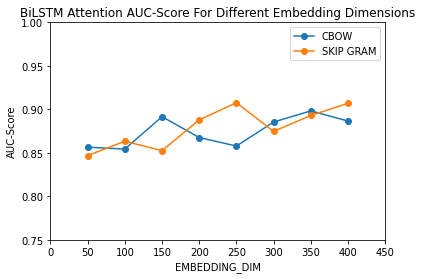

In [62]:
plt.plot(n,y1,label="CBOW",marker='o')
plt.plot(n,y2,label="SKIP GRAM",marker='o')
plt.axis([0,450,0.75,1.00])
plt.xlabel('EMBEDDING_DIM')
plt.ylabel('AUC-Score')
plt.legend()
plt.title('BiLSTM Attention AUC-Score For Different Embedding Dimensions')
# plt.savefig('skipgram.png')
plt.show()
